# **1. Procesamiento**

## **1.1. Preparación del Drive**

In [32]:
# Nos conectamos al Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [33]:
# Cambiar el directorio de trabajo
import os
os.chdir('/content/drive/My Drive/BCRP/input')

# Mostrar el directorio actual de trabajo
print("Directorio actual:", os.getcwd())

# Listar todos los archivos y carpetas en el directorio actual
print("\nArchivos y carpetas en el directorio actual:")
print(os.listdir())

!ls "/content/drive/My Drive/BCRP/input"

Directorio actual: /content/drive/My Drive/BCRP/input

Archivos y carpetas en el directorio actual:
['Usoactual_AMAZONAS.dbf', 'Usoactual_AMAZONAS.shx', 'Usoactual_LAMBAYEQUE.dbf', 'Usoactual_LAMBAYEQUE.sbx', 'Usoactual_LAMBAYEQUE.shp', 'Usoactual_LAMBAYEQUE.prj', 'Usoactual_LAMBAYEQUE.sbn', 'Usoactual_LAMBAYEQUE.shx', 'Usoactual_LAMBAYEQUE.shp.xml', 'Usoactual_PIURA.prj', 'Usoactual_PIURA.shp', 'Usoactual_PIURA.sbx', 'Usoactual_PIURA.sbn', 'Usoactual_PIURA.shx', 'Usoactual_PIURA.dbf', 'Usoactual_PIURA.shp.xml', 'Lima_Hectareas_Senasa.xlsx', 'INEI_LIMITE_DEPARTAMENTAL.shp', 'INEI_LIMITE_DISTRITAL.shp', 'INEI_LIMITE_DEPARTAMENTAL.cpg', 'INEI_LIMITE_DEPARTAMENTAL.shp.xml', 'INEI_LIMITE_DEPARTAMENTAL.dbf', 'INEI_LIMITE_DEPARTAMENTAL.prj', 'INEI_LIMITE_DEPARTAMENTAL.sbn', 'INEI_LIMITE_DEPARTAMENTAL.sbx', 'INEI_LIMITE_DISTRITAL.cpg', 'INEI_LIMITE_DISTRITAL.dbf', 'INEI_LIMITE_DISTRITAL.prj', 'INEI_LIMITE_DISTRITAL.sbn', 'INEI_LIMITE_DISTRITAL.sbx', 'INEI_LIMITE_DISTRITAL.shx', 'INEI_LIMITE_P

## **1.2. Importación de librerías**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter, AutoDateLocator

# Ruta del input
ruta = '/content/drive/My Drive/BCRP/input/limon.xlsx'

# Cargar los datos
df = pd.read_excel(ruta)

# Convertir fecha a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], origin='1899-12-30', unit='D')


# Ver estructura
df.head()


,FECHA,ANIO,TRIMESTRE,MES,DIA,ANIO_ISO,SEMANA,MERCADO,PRODUCTO,VARIEDAD,PRECIO_MAX,PRECIO_PROM,PRECIO_MIN,Unnamed: 13
0,2017-01-01,2017,1,1,1,2016,52,Mayorista de Lima,Limon,Limon Sutil Bolsa,1.39,1.33,1.28,NaT
1,2017-01-01,2017,1,1,1,2016,52,Mayorista de Lima,Limon,Limon Sutil Cajon,1.96,1.86,1.74,NaT
2,2017-01-02,2017,1,1,2,2017,1,Mayorista de Lima,Limon,Limon Sutil Bolsa,1.33,1.28,1.22,NaT
3,2017-01-02,2017,1,1,2,2017,1,Mayorista de Lima,Limon,Limon Sutil Cajon,1.96,1.83,1.74,NaT
4,2017-01-03,2017,1,1,3,2017,1,Mayorista de Lima,Limon,Limon Sutil Bolsa,1.22,1.17,1.11,NaT


## **1.3. Carga de la data**


In [35]:
bolsa = df[df['VARIEDAD'] == 'Limon Sutil Bolsa'].copy()
cajon = df[df['VARIEDAD'] == 'Limon Sutil Cajon'].copy()

# **2. Análisis**

## **2.1. Evolución diaria**




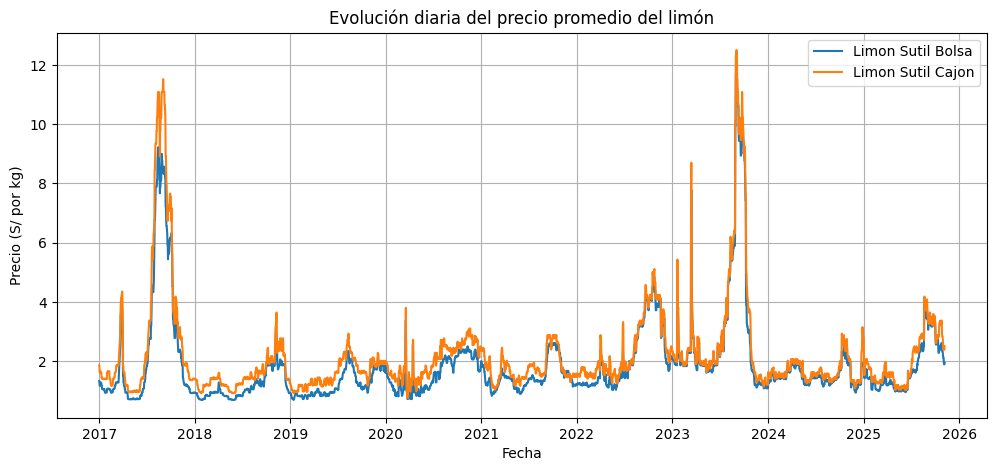

In [36]:
plt.figure(figsize=(12,5))
plt.plot(bolsa['FECHA'], bolsa['PRECIO_PROM'], label='Limon Sutil Bolsa')
plt.plot(cajon['FECHA'], cajon['PRECIO_PROM'], label='Limon Sutil Cajon')
plt.title('Evolución diaria del precio promedio del limón')
plt.xlabel('Fecha')
plt.ylabel('Precio (S/ por kg)')
plt.legend()
plt.grid(True)
plt.show()


## **2.2. Análisis técnico**


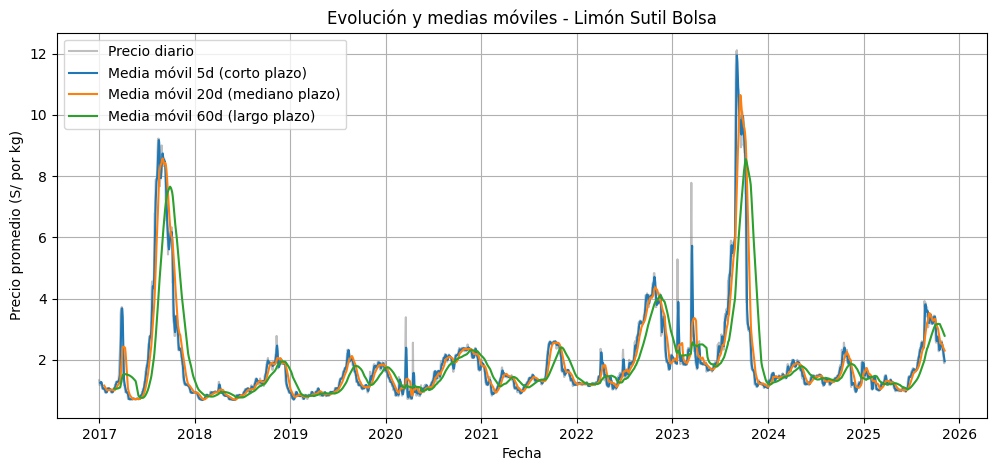

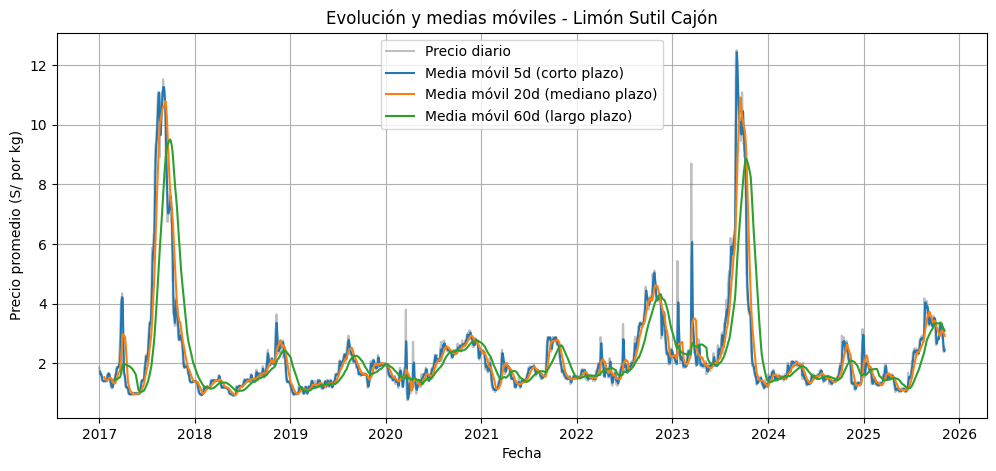

In [37]:
# Crear las medias móviles
for df_, nombre in [(bolsa, 'Bolsa'), (cajon, 'Cajón')]:
    df_['MMA_5'] = df_['PRECIO_PROM'].rolling(5).mean()
    df_['MMA_20'] = df_['PRECIO_PROM'].rolling(20).mean()
    df_['MMA_60'] = df_['PRECIO_PROM'].rolling(60).mean()

    plt.figure(figsize=(12,5))
    plt.plot(df_['FECHA'], df_['PRECIO_PROM'], label='Precio diario', alpha=0.5, color='gray')
    plt.plot(df_['FECHA'], df_['MMA_5'], label='Media móvil 5d (corto plazo)')
    plt.plot(df_['FECHA'], df_['MMA_20'], label='Media móvil 20d (mediano plazo)')
    plt.plot(df_['FECHA'], df_['MMA_60'], label='Media móvil 60d (largo plazo)')
    plt.title(f'Evolución y medias móviles - Limón Sutil {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio promedio (S/ por kg)')
    plt.legend()
    plt.grid(True)
    plt.show()



In [38]:
# Ordenar por fecha
df = df.sort_values('FECHA')

# Filtrar últimos 180 días
ultimos = df[df['FECHA'] >= df['FECHA'].max() - pd.Timedelta(days=180)]


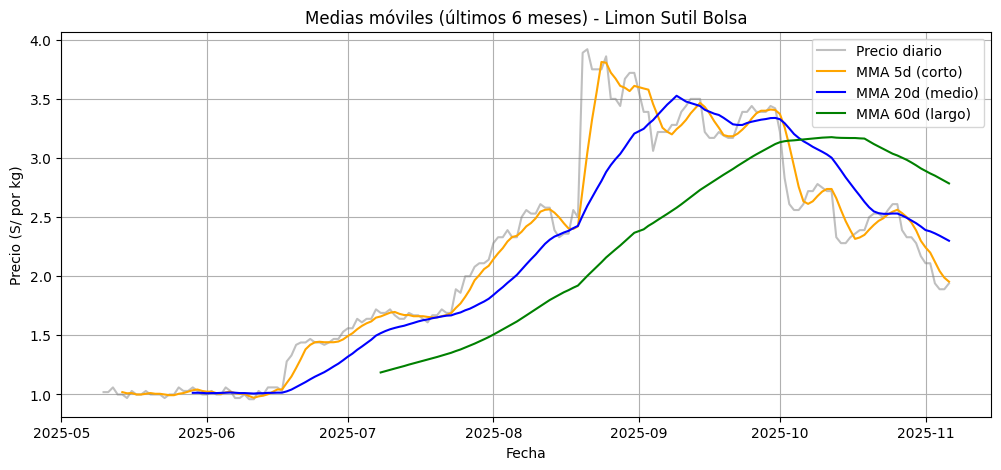

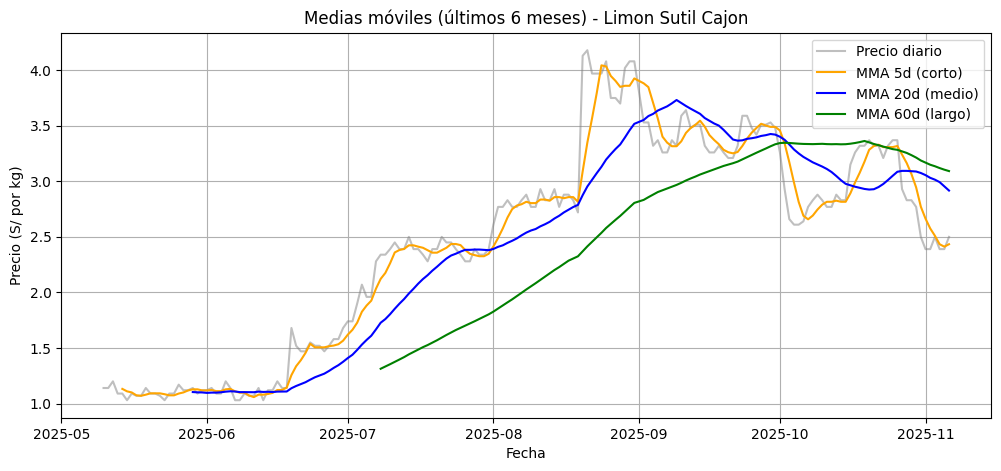

In [39]:
for variedad in ['Limon Sutil Bolsa', 'Limon Sutil Cajon']:
    sub = ultimos[ultimos['VARIEDAD'] == variedad].copy()
    sub['MMA_5'] = sub['PRECIO_PROM'].rolling(5).mean()
    sub['MMA_20'] = sub['PRECIO_PROM'].rolling(20).mean()
    sub['MMA_60'] = sub['PRECIO_PROM'].rolling(60).mean()

    plt.figure(figsize=(12,5))
    plt.plot(sub['FECHA'], sub['PRECIO_PROM'], label='Precio diario', color='gray', alpha=0.5)
    plt.plot(sub['FECHA'], sub['MMA_5'], label='MMA 5d (corto)', color='orange')
    plt.plot(sub['FECHA'], sub['MMA_20'], label='MMA 20d (medio)', color='blue')
    plt.plot(sub['FECHA'], sub['MMA_60'], label='MMA 60d (largo)', color='green')
    plt.title(f'Medias móviles (últimos 6 meses) - {variedad}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (S/ por kg)')
    plt.legend()
    plt.grid(True)
    plt.show()


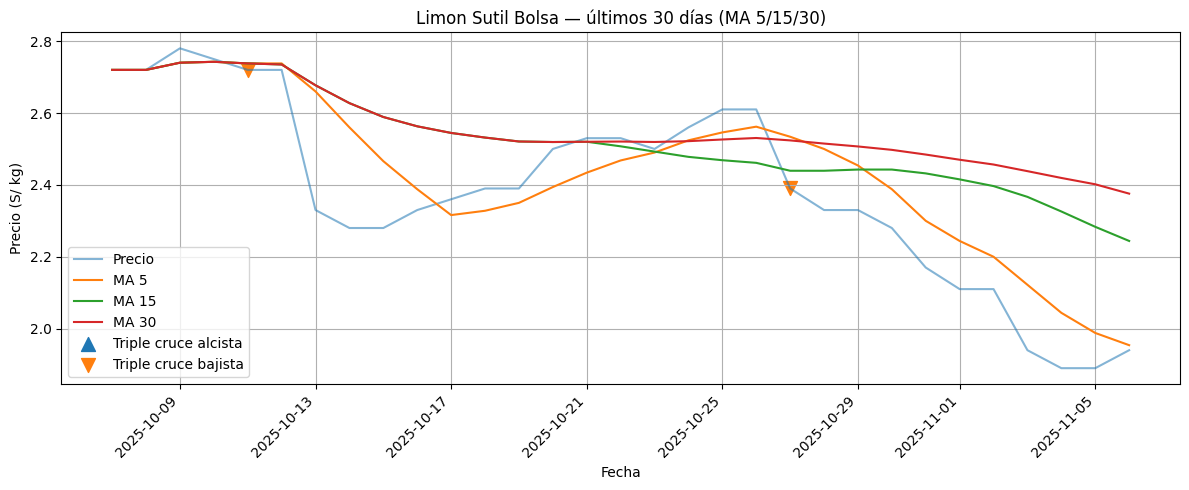

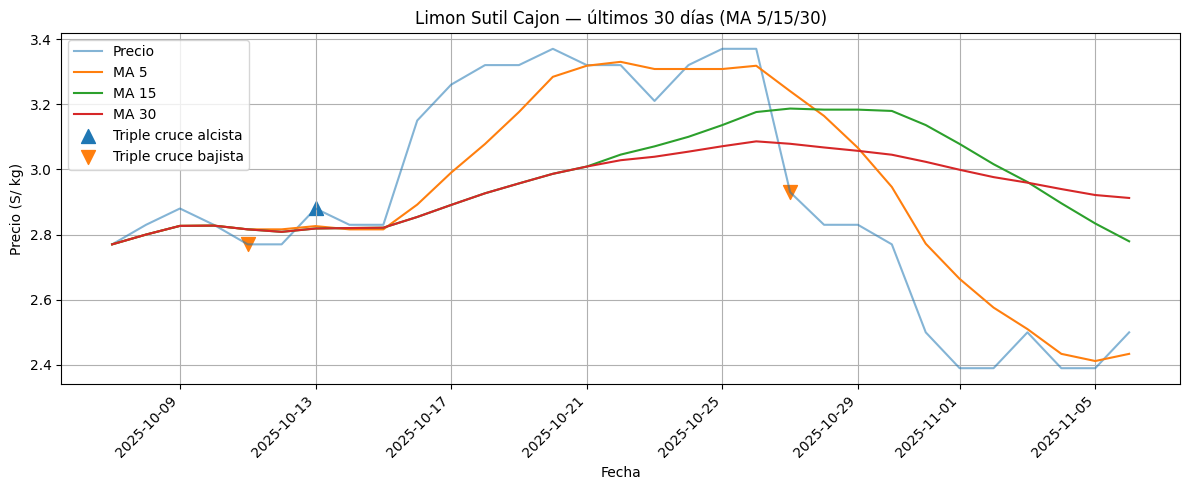

In [40]:

VENTANA_DIAS = 30
W1, W2, W3 = 5, 15, 30

import numpy as np
from matplotlib.dates import DateFormatter, AutoDateLocator


for d in (df, bolsa, cajon):
    d['PRECIO_PROM'] = pd.to_numeric(d['PRECIO_PROM'], errors='coerce')
    d.sort_values('FECHA', inplace=True)

def reciente(sub, dias=30):
    fmax = sub['FECHA'].max()
    return sub[sub['FECHA'] >= fmax - pd.Timedelta(days=dias)].copy()

def add_ma(sub, w1=W1, w2=W2, w3=W3):
    sub = sub.copy()
    sub[f'MA{w1}'] = sub['PRECIO_PROM'].rolling(w1, min_periods=1).mean()
    sub[f'MA{w2}'] = sub['PRECIO_PROM'].rolling(w2, min_periods=1).mean()
    sub[f'MA{w3}'] = sub['PRECIO_PROM'].rolling(w3, min_periods=1).mean()
    return sub

def triple_cruces(sub, w1=W1, w2=W2, w3=W3):
    p = sub['PRECIO_PROM']
    ma1, ma2, ma3 = sub[f'MA{w1}'], sub[f'MA{w2}'], sub[f'MA{w3}']
    above_all = (p > ma1) & (p > ma2) & (p > ma3)
    below_all = (p < ma1) & (p < ma2) & (p < ma3)
    # Señales
    alcista =  above_all & below_all.shift(1, fill_value=False)
    bajista =  below_all & above_all.shift(1, fill_value=False)
    return alcista, bajista

def plot_triple(sub, titulo, w1=W1, w2=W2, w3=W3):
    if sub.empty or sub['FECHA'].nunique() < 3:
        print(f'⚠️ Pocos datos para {titulo} en {VENTANA_DIAS} días.')
        return
    sub = add_ma(sub, w1, w2, w3)
    alcista, bajista = triple_cruces(sub, w1, w2, w3)

    plt.figure(figsize=(12,5))
    plt.plot(sub['FECHA'], sub['PRECIO_PROM'], label='Precio', alpha=0.55)
    plt.plot(sub['FECHA'], sub[f'MA{w1}'], label=f'MA {w1}')
    plt.plot(sub['FECHA'], sub[f'MA{w2}'], label=f'MA {w2}')
    plt.plot(sub['FECHA'], sub[f'MA{w3}'], label=f'MA {w3}')
    # Marcas solo si el precio cruza las tres a la vez
    plt.scatter(sub.loc[alcista, 'FECHA'], sub.loc[alcista, 'PRECIO_PROM'],
                marker='^', s=100, label='Triple cruce alcista')
    plt.scatter(sub.loc[bajista, 'FECHA'], sub.loc[bajista, 'PRECIO_PROM'],
                marker='v', s=100, label='Triple cruce bajista')

    plt.title(f'{titulo} — últimos {VENTANA_DIAS} días (MA {w1}/{w2}/{w3})')
    plt.xlabel('Fecha'); plt.ylabel('Precio (S/ kg)')
    plt.grid(True); plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(AutoDateLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# ===== Ejecutar (últimos 30 días) =====
bolsa_30 = reciente(bolsa, VENTANA_DIAS)
cajon_30 = reciente(cajon, VENTANA_DIAS)

plot_triple(bolsa_30, 'Limon Sutil Bolsa')
plot_triple(cajon_30, 'Limon Sutil Cajon')
